In [9]:
# Célula 1: Imports e Configuração do Path
import sys
import os
import time
import matplotlib.pyplot as plt
import pandas as pd

# Adiciona a raiz do projeto ao Python Path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

# Importa AMBAS as versões da nossa Lista Encadeada
from src.estrutura_de_dados.lista_encadeada import LinkedList # A original
from src.estrutura_de_dados.lista_encadeada_otimizada import LinkedListOptimized # A otimizada

def get_ll_memory_usage(self):
    if not self.head: return 0
    size = sys.getsizeof(self)
    node = self.head
    while node:
        size += sys.getsizeof(node)
        node = node.next
    return size

LinkedList.get_memory_usage = get_ll_memory_usage
LinkedListOptimized.get_memory_usage = get_ll_memory_usage

print("✅ Ambiente e classes prontas para o teste.")

print("Ambiente pronto!")

✅ Ambiente e classes prontas para o teste.
Ambiente pronto!


In [ ]:
# Célula 2: Benchmark de Inserção

NUM_ITENS = 10000 # Vamos usar um número grande para ver a diferença claramente

# --- Benchmark da Lista Original (Lenta) ---
lista_original = LinkedList()
start_original = time.perf_counter()
for i in range(NUM_ITENS):
    lista_original.insert(i)
end_original = time.perf_counter()
tempo_original = end_original - start_original
memoria_original = lista_original.get_memory_usage()

print(f"Tempo de inserção na Lista Original (O(n²)): {tempo_original:.4f} segundos")

# --- Benchmark da Lista Otimizada (Rápida) ---
lista_otimizada = LinkedListOptimized()
start_otimizada = time.perf_counter()
for i in range(NUM_ITENS):
    lista_otimizada.insert(i)
end_otimizada = time.perf_counter()
tempo_otimizada = end_otimizada - start_otimizada
memoria_otimizada = lista_otimizada.get_memory_usage()

print(f"Tempo de inserção na Lista Otimizada (O(n)): {tempo_otimizada:.4f} segundos")


# --- Análise ---
if tempo_otimizada > 0:
    ganho = tempo_original / tempo_otimizada
    print(f"\nA versão otimizada foi aproximadamente {ganho:.2f} vezes mais rápida!")

Tempo de inserção na Lista Original (O(n²)): 1.2358 segundos
Tempo de inserção na Lista Otimizada (O(n)): 0.0094 segundos

A versão otimizada foi aproximadamente 131.21 vezes mais rápida!


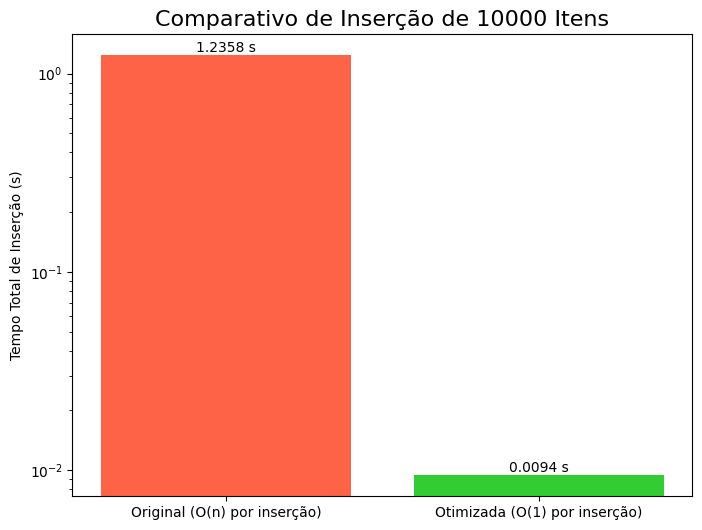

In [3]:
# Célula 3: Visualização do Ganho de Performance

estruturas = ['Original (O(n) por inserção)', 'Otimizada (O(1) por inserção)']
tempos = [tempo_original, tempo_otimizada]
cores = ['#ff6347', '#32cd32'] # Vermelho e Verde

plt.figure(figsize=(8, 6))
bars = plt.bar(estruturas, tempos, color=cores)
plt.ylabel("Tempo Total de Inserção (s)")
plt.title(f"Comparativo de Inserção de {NUM_ITENS} Itens", fontsize=16)

# Adiciona o valor em cima da barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f} s', va='bottom', ha='center')

plt.yscale('log') # Escala logarítmica é essencial aqui!
plt.show()

In [4]:
# Célula 4: Benchmarks de Busca e Remoção

print("--- Preparando para os testes de Busca e Remoção ---")
# Reutilizamos as listas já populadas: 'lista_original' e 'lista_otimizada'
# Vamos escolher um elemento perto do final para testar o pior caso
item_alvo = NUM_ITENS - 100 
print(f"Item alvo para busca e remoção: {item_alvo}\n")


# --- Benchmark de BUSCA ---
print("--- Iniciando Benchmark de BUSCA ---")
start_busca_orig = time.perf_counter()
lista_original.search(item_alvo)
end_busca_orig = time.perf_counter()
tempo_busca_original = end_busca_orig - start_busca_orig
print(f"Tempo de busca na Lista Original: {tempo_busca_original:.6f} segundos")

start_busca_opt = time.perf_counter()
lista_otimizada.search(item_alvo)
end_busca_opt = time.perf_counter()
tempo_busca_otimizada = end_busca_opt - start_busca_opt
print(f"Tempo de busca na Lista Otimizada: {tempo_busca_otimizada:.6f} segundos")


# --- Benchmark de REMOÇÃO ---
print("\n--- Iniciando Benchmark de REMOÇÃO ---")
start_remocao_orig = time.perf_counter()
lista_original.remove(item_alvo)
end_remocao_orig = time.perf_counter()
tempo_remocao_original = end_remocao_orig - start_remocao_orig
print(f"Tempo de remoção na Lista Original: {tempo_remocao_original:.6f} segundos")

start_remocao_opt = time.perf_counter()
lista_otimizada.remove(item_alvo)
end_remocao_opt = time.perf_counter()
tempo_remocao_otimizada = end_remocao_opt - start_remocao_opt
print(f"Tempo de remoção na Lista Otimizada: {tempo_remocao_otimizada:.6f} segundos")

--- Preparando para os testes de Busca e Remoção ---
Item alvo para busca e remoção: 9900

--- Iniciando Benchmark de BUSCA ---
Tempo de busca na Lista Original: 0.000665 segundos
Tempo de busca na Lista Otimizada: 0.001393 segundos

--- Iniciando Benchmark de REMOÇÃO ---
Tempo de remoção na Lista Original: 0.001431 segundos
Tempo de remoção na Lista Otimizada: 0.000870 segundos


In [7]:
# Célula 5: Tabela e Gráfico Final da Otimização

# --- 1. Criando a Tabela Consolidada ---

# Organiza todos os tempos medidos em um dicionário
dados_otimizacao = {
    "Tempo Original (s)": [tempo_original, tempo_busca_original, tempo_remocao_original],
    "Tempo Otimizado (s)": [tempo_otimizada, tempo_busca_otimizada, tempo_remocao_otimizada]
}

# Define as operações como o índice da tabela
operacoes = ["Inserção (Total)", "Busca (1 item)", "Remoção (1 item)"]

# Cria o DataFrame
df_otimizacao = pd.DataFrame(dados_otimizacao, index=operacoes)

# Calcula a coluna de ganho de performance
df_otimizacao["Ganho (x mais rápido)"] = df_otimizacao["Tempo Original (s)"] / df_otimizacao["Tempo Otimizado (s)"]

print("--- Tabela Comparativa da Otimização da Lista Encadeada ---")
# Usamos display() que formata a tabela de forma mais bonita no notebook
display(df_otimizacao.round(6))
# No final da célula, após o display(df_otimizacao)

# --- SALVANDO A TABELA DE RESULTADOS ---

# 1. Define o nome do diretório e do arquivo
output_dir = '../resultados' # Usa '..' para voltar da pasta 'notebooks' para a raiz
output_filename_csv = 'benchmark_otimizacao_linkedlist.csv'

# 2. Garante que o diretório de resultados exista
os.makedirs(output_dir, exist_ok=True)

# 3. Cria o caminho completo para o arquivo
filepath_csv = os.path.join(output_dir, output_filename_csv)

# 4. Salva o DataFrame para o arquivo CSV
# index=True garante que a coluna de índice (com os nomes das operações) seja salva
df_otimizacao.to_csv(filepath_csv, index=True)
# Pode ser na mesma célula de salvamento

output_filename_excel = 'benchmark_otimizacao_linkedlist.xlsx'
filepath_excel = os.path.join(output_dir, output_filename_excel)

# Salva o DataFrame para o arquivo Excel
df_otimizacao.to_excel(filepath_excel, index=True)

print(f"✅ Tabela de resultados salva com sucesso em: {filepath_excel}")

print(f"\n✅ Tabela de resultados salva com sucesso em: {filepath_csv}")

--- Tabela Comparativa da Otimização da Lista Encadeada ---


,Tempo Original (s),Tempo Otimizado (s),Ganho (x mais rápido)
Inserção (Total),1.235836,0.009419,131.212293
Busca (1 item),0.000665,0.001393,0.477240
Remoção (1 item),0.001431,0.000870,1.645050


✅ Tabela de resultados salva com sucesso em: ../resultados\benchmark_otimizacao_linkedlist.xlsx

✅ Tabela de resultados salva com sucesso em: ../resultados\benchmark_otimizacao_linkedlist.csv


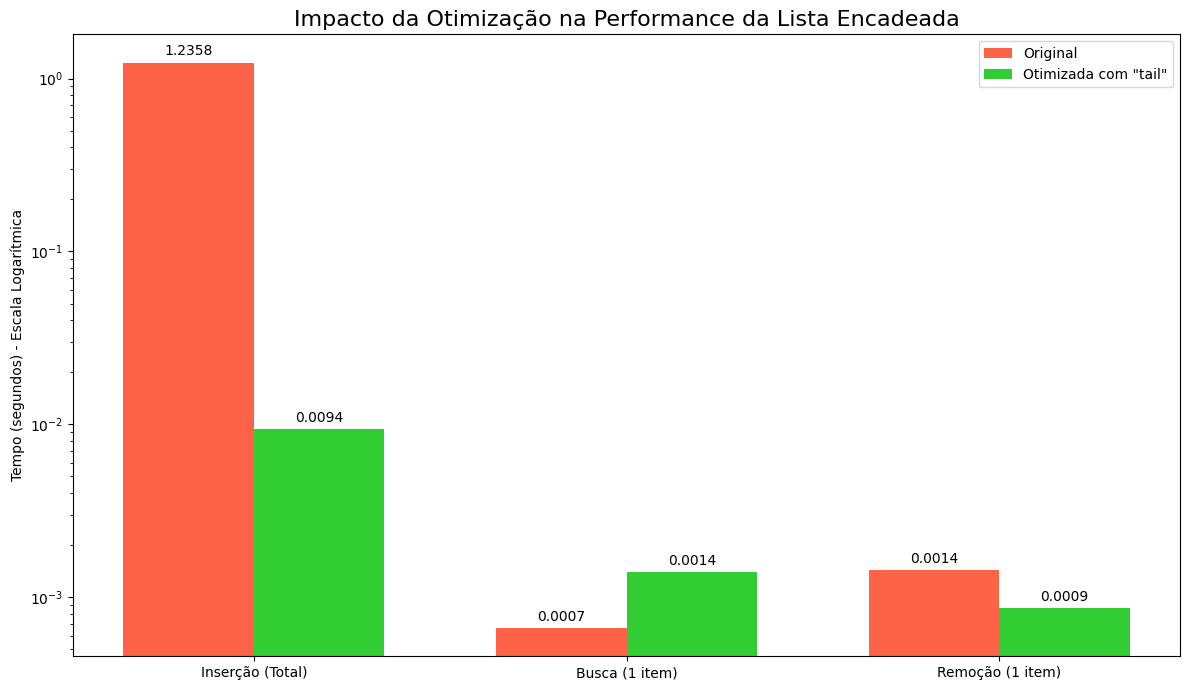

In [6]:
# --- 2. Criando o Gráfico de Barras Agrupadas ---

import numpy as np

labels = df_otimizacao.index
original_times = df_otimizacao['Tempo Original (s)']
optimized_times = df_otimizacao['Tempo Otimizado (s)']

x = np.arange(len(labels))  # As posições dos rótulos no eixo X
width = 0.35  # A largura das barras

fig, ax = plt.subplots(figsize=(12, 7))

# Cria as barras para os tempos originais e otimizados, com um pequeno deslocamento
rects1 = ax.bar(x - width/2, original_times, width, label='Original', color='#ff6347') # Vermelho Tomate
rects2 = ax.bar(x + width/2, optimized_times, width, label='Otimizada com "tail"', color='#32cd32') # Verde Lima

# Adiciona títulos, legendas e rótulos
ax.set_ylabel('Tempo (segundos) - Escala Logarítmica')
ax.set_title('Impacto da Otimização na Performance da Lista Encadeada', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# A escala logarítmica é ESSENCIAL aqui para que a enorme diferença na inserção
# não achate as outras barras a ponto de não serem visíveis.
ax.set_yscale('log')

# Função para adicionar os rótulos de dados em cima das barras
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

fig.tight_layout()
plt.show()


Populando ambas as listas com 10000 itens...

--- Resultados do Uso de Memória ---
Memória da Lista Original:   480,048 bytes
Memória da Lista Otimizada:  480,048 bytes
Diferença:                   0 bytes a mais na versão otimizada


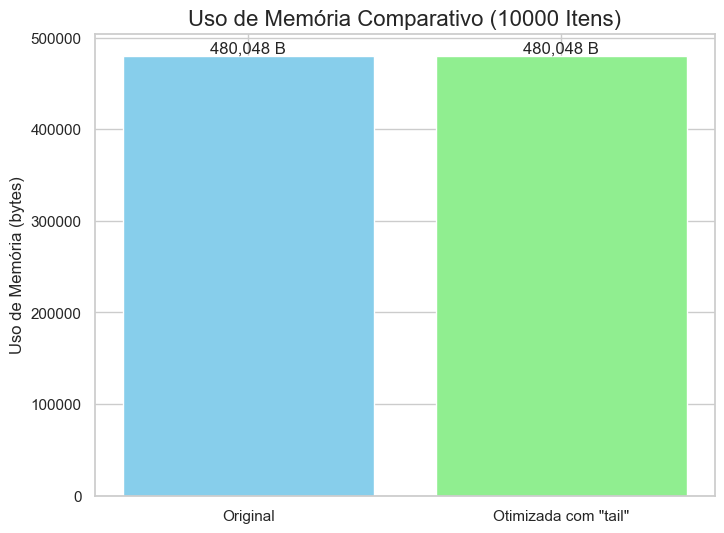

In [18]:
import seaborn as sns
# --- 2. Execução do Teste ---
N_ITENS = 10000 # Um número grande de itens para a medição ser significativa
print(f"\nPopulando ambas as listas com {N_ITENS} itens...")

# Popula e mede a memória da lista original
lista_original = LinkedList()
for i in range(N_ITENS):
    lista_original.insert(i)
memoria_original = lista_original.get_memory_usage()

# Popula e mede a memória da lista otimizada
lista_otimizada = LinkedListOptimized()
for i in range(N_ITENS):
    lista_otimizada.insert(i)
memoria_otimizada = lista_otimizada.get_memory_usage()

diferenca = memoria_otimizada - memoria_original

print("\n--- Resultados do Uso de Memória ---")
print(f"Memória da Lista Original:   {memoria_original:,.0f} bytes")
print(f"Memória da Lista Otimizada:  {memoria_otimizada:,.0f} bytes")
print(f"Diferença:                   {diferenca:,.0f} bytes a mais na versão otimizada")


# --- 3. Visualização dos Resultados ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

labels = ['Original', 'Otimizada com "tail"']
memory_values = [memoria_original, memoria_otimizada]
bars = plt.bar(labels, memory_values, color=['skyblue', 'lightgreen'])

# Adiciona os valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f} B', va='bottom', ha='center', fontsize=12)

plt.ylabel("Uso de Memória (bytes)")
plt.title(f"Uso de Memória Comparativo ({N_ITENS} Itens)", fontsize=16)
plt.show()


In [16]:
# Célula 4: Benchmark de Latência Média (Carga Mista)

N_OPERACOES = 10000
N_ITEMS = 10000
operacoes = np.random.choice(['insercao', 'busca', 'remocao'], size=N_OPERACOES, p=[0.5, 0.4, 0.1])
itens_aleatorios = np.random.randint(0, N_ITEMS * 2, size=N_OPERACOES)

# Reinicia as listas para o teste
lista_original_lat = LinkedList()
lista_otimizada_lat = LinkedListOptimized()

# Teste na Original
start_total_orig = time.perf_counter()
for op, item in zip(operacoes, itens_aleatorios):
    if op == 'insercao': lista_original_lat.insert(item)
    elif op == 'busca': lista_original_lat.search(item)
    elif op == 'remocao': lista_original_lat.remove(item)
tempo_total_orig = time.perf_counter() - start_total_orig
latencia_media_orig = tempo_total_orig / N_OPERACOES

# Teste na Otimizada
start_total_opt = time.perf_counter()
for op, item in zip(operacoes, itens_aleatorios):
    if op == 'insercao': lista_otimizada_lat.insert(item)
    elif op == 'busca': lista_otimizada_lat.search(item)
    elif op == 'remocao': lista_otimizada_lat.remove(item)
tempo_total_opt = time.perf_counter() - start_total_opt
latencia_media_opt = tempo_total_opt / N_OPERACOES

print(f"\n--- Comparativo de Latência Média (Carga Mista) ---")
print(f"Latência Média (Original): {latencia_media_orig * 1e6:.2f} µs por operação")
print(f"Latência Média (Otimizada): {latencia_media_opt * 1e6:.2f} µs por operação")


--- Comparativo de Latência Média (Carga Mista) ---
Latência Média (Original): 102.24 µs por operação
Latência Média (Otimizada): 61.21 µs por operação



--- Testando Escalabilidade da Inserção ---
Testando para N = 1000...
Testando para N = 2500...
Testando para N = 5000...
Testando para N = 7500...
Testando para N = 10000...


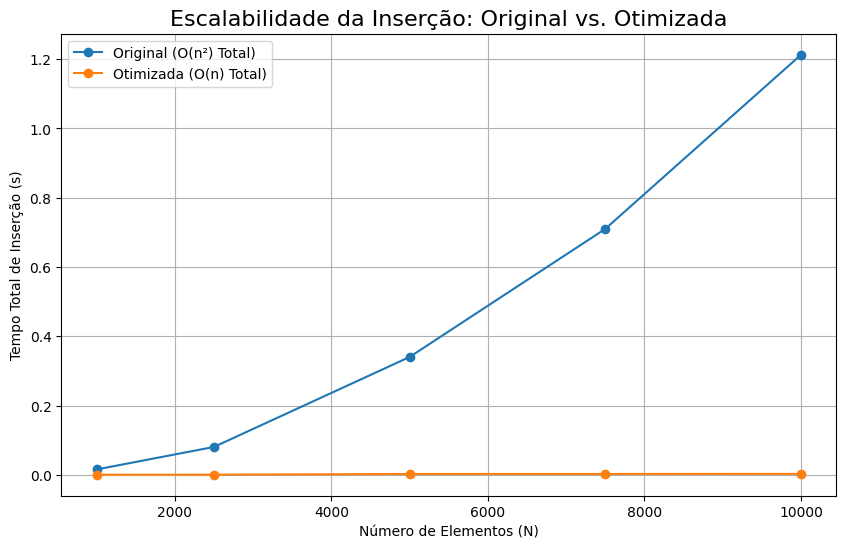

In [11]:
# Célula 5: Benchmark de Escalabilidade

tamanhos_n = [1000, 2500, 5000, 7500, 10000]
tempos_orig = []
tempos_opt = []

print("\n--- Testando Escalabilidade da Inserção ---")
for n in tamanhos_n:
    print(f"Testando para N = {n}...")
    # Original
    ll_orig = LinkedList()
    start = time.perf_counter(); [ll_orig.insert(i) for i in range(n)]; tempos_orig.append(time.perf_counter() - start)
    # Otimizada
    ll_opt = LinkedListOptimized()
    start = time.perf_counter(); [ll_opt.insert(i) for i in range(n)]; tempos_opt.append(time.perf_counter() - start)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tamanhos_n, tempos_orig, marker='o', label='Original (O(n²) Total)')
plt.plot(tamanhos_n, tempos_opt, marker='o', label='Otimizada (O(n) Total)')
plt.xlabel("Número de Elementos (N)")
plt.ylabel("Tempo Total de Inserção (s)")
plt.title("Escalabilidade da Inserção: Original vs. Otimizada", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()